In [1]:
#%%
"""
Created on Thu Nov 27 2018
Integrated Brownian motion
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ComputeIntegrals(NoOfPaths,NoOfSteps,T,g):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    I1 = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        I1[:,i+1] = I1[:,i] + g(time[i]) *(W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt

    paths = {"time":time,"W":W,"I1":I1}
    return paths

Mean = -1.127986593019159e-17 and variance =0.2020636524300317


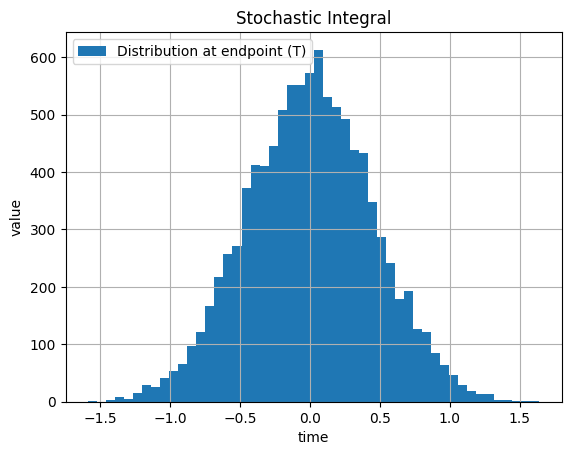

In [5]:
NoOfPaths = 10000
NoOfSteps = 1000
T = 1

g = lambda t: t**2

output = ComputeIntegrals(NoOfPaths,NoOfSteps,T , g)
timeGrid = output["time"]
G_T = output["I1"]

plt.figure(1)
plt.grid()
plt.hist(G_T[:,-1],50, label="Distribution at endpoint (T)")      # Distribution at T
plt.xlabel("time")
plt.ylabel("value")
plt.title("Stochastic Integral")
plt.legend()

EX = np.mean(G_T[:,-1])
Var = np.var(G_T[:,-1])
print('Mean = {0} and variance ={1}'.format(EX,Var))
